In [1]:
!git clone https://github.com/Karol-G/Gcam_cat_dog_examples.git

fatal: destination path 'Gcam_cat_dog_examples' already exists and is not an empty directory.


In [2]:
pip install medcam

In [3]:
from torchvision import models
from torchvision import transforms as T
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torch
import cv2

# Setup the model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = models.resnet152(pretrained=True)
model.to(device=device)
model.eval()

def load_image(image_path):
    raw_image = cv2.imread(image_path)
    # raw_image = cv2.resize(raw_image, (224,) * 2)
    raw_image = cv2.resize(raw_image, (224, 224))
    image = T.Compose(
        [
            T.ToTensor(),
            T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ]
    )(raw_image[..., ::-1].copy())
    image = image.to(device)
    return image

# Load the dataset
dataset = ImageFolder('/content/Gcam_cat_dog_examples/dataset', loader=load_image)
# Set up the dataloader
data_loader = DataLoader(dataset, batch_size=1, shuffle=False)

In [4]:
from medcam import medcam

model = medcam.inject(model, output_dir='attention_maps', backend='gcam', layer='auto', label='best', save_maps=True)

In [5]:
batch = next(iter(data_loader))
_ = model(batch[0])

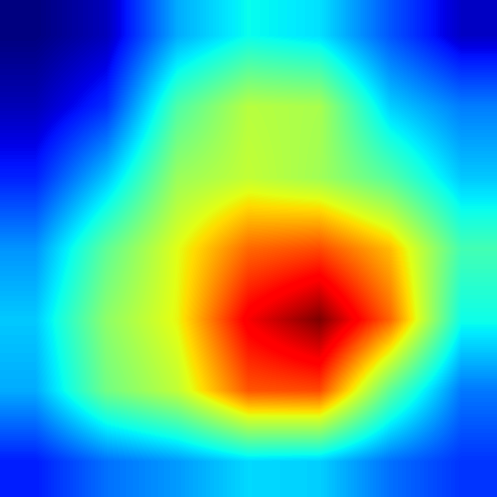

In [6]:
from IPython.display import Image

Image('/content/attention_maps/layer4/attention_map_0_0_0.png')

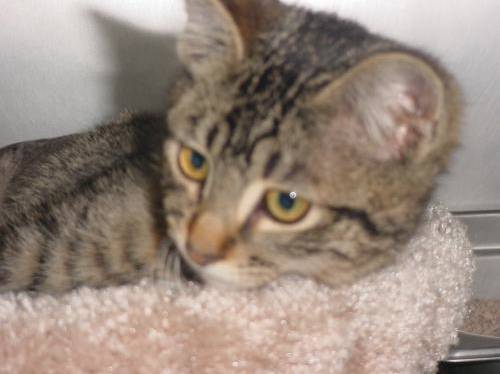

In [7]:
Image('/content/Gcam_cat_dog_examples/dataset/cats/001.jpg')